In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

In [3]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter serverextension enable voila --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling: voila
- Writing config: C:\Users\falco\anaconda3\etc\jupyter
    - Validating...
      voila 0.3.5 ok


In [3]:
# namePlace = ['H', 'V', 'P', 'M', 'R', 'L']
# c = [[], [], [], [], [], []]
# for i in range(6):
#     for j in range(6):
#         c[i].append(widgets.IntText(description = str(namePlace[i] + namePlace[j])))

# matrixInput = widgets.VBox([        
# widgets.HBox([c[0][0], c[0][1], c[0][2], c[0][3], c[0][4], c[0][5]]),
# widgets.HBox([c[1][0], c[1][1], c[1][2], c[1][3], c[1][4], c[1][5]]),
# widgets.HBox([c[2][0], c[2][1], c[2][2], c[2][3], c[2][4], c[2][5]]),
# widgets.HBox([c[3][0], c[3][1], c[3][2], c[3][3], c[3][4], c[3][5]]),
# widgets.HBox([c[4][0], c[4][1], c[4][2], c[4][3], c[4][4], c[4][5]]),
# widgets.HBox([c[5][0], c[5][1], c[5][2], c[5][3], c[5][4], c[5][5]])])


In [34]:
namePlace = ['H', 'V', 'P', 'M', 'R', 'L']
cT = [[], [], [], [], [], []]
for i in range(6):
    for j in range(6):
        cT[i].append(widgets.IntText(description = str(namePlace[i] + namePlace[j])))

matrixInput = widgets.VBox([        
widgets.HBox([cT[0][0], cT[0][1], cT[0][2], cT[0][3], cT[0][4], cT[0][5]]),
widgets.HBox([cT[1][0], cT[1][1], cT[1][2], cT[1][3], cT[1][4], cT[1][5]]),
widgets.HBox([cT[2][0], cT[2][1], cT[2][2], cT[2][3], cT[2][4], cT[2][5]]),
widgets.HBox([cT[3][0], cT[3][1], cT[3][2], cT[3][3], cT[3][4], cT[3][5]]),
widgets.HBox([cT[4][0], cT[4][1], cT[4][2], cT[4][3], cT[4][4], cT[4][5]]),
widgets.HBox([cT[5][0], cT[5][1], cT[5][2], cT[5][3], cT[5][4], cT[5][5]])])

# button send
button_send = widgets.Button(
                description='Create Matrices',
                tooltip='generate your matrices!',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        output.clear_output()
        display(calculate(cT))

def calculate(cT):
    # z=0,1 x=2,3 y=4,5
    #frequency matrix
    f = np.zeros((6, 6))
    c = np.zeros((6, 6))
    place = -1
    # zz zx zy, xz xx xy, yz yx yy
    # 3x3 matrix with all possible basis for frequency calculations
    for i in range(len(cT)):
        for j in range(len(cT)):
            c[i, j] = cT[i][j].value
    
    
    b = [[c[0, 0]+c[0, 1]+c[1, 0]+c[1, 1], c[0, 2]+c[0, 3]+c[1, 2]+c[1, 3], c[0, 4]+c[0, 5]+c[1, 4]+c[1, 5]],
        [c[2, 0]+c[2, 1]+c[3, 0]+c[3, 1], c[2, 2]+c[2, 3]+c[3, 2]+c[3, 3], c[2, 4]+c[2, 5]+c[3, 4]+c[3, 5]],
        [c[4, 0]+c[4, 1]+c[5, 0]+c[5, 1], c[4, 2]+c[4, 3]+c[5, 2]+c[5, 3], c[4, 4]+c[4, 5]+c[5, 4]+c[5, 5]]]

    for i in f:
        place += 1
        for j in range(i.size):
            i[j] = c[place][j]/b[place//2][j//2] 

    #full tensor correlations 
    fT = [[f[0, 0]-f[0, 1]-f[1, 0]+f[1, 1], f[0, 2]-f[0, 3]-f[1, 2]+f[1, 3], f[0, 4]-f[0, 5]-f[1, 4]+f[1, 5]],
        [f[2, 0]-f[2, 1]-f[3, 0]+f[3, 1], f[2, 2]-f[2, 3]-f[3, 2]+f[3, 3], f[2, 4]-f[2, 5]-f[3, 4]+f[3, 5]],
        [f[4, 0]-f[4, 1]-f[5, 0]+f[5, 1], f[4, 2]-f[4, 3]-f[5, 2]+f[5, 3], f[4, 4]-f[4, 5]-f[5, 4]+f[5, 5]]]

    #Alteration of full tensor matrix - supposedly suited for partial correlations

    #frequencies for correlations with identity pauli matrix LAST
    pT0L = [[f[0, 0]+f[0, 1]-f[1, 0]-f[1, 1], f[0, 2]+f[0, 3]-f[1, 2]-f[1, 3], f[0, 4]+f[0, 5]-f[1, 4]-f[1, 5]],
            [f[2, 0]+f[2, 1]-f[3, 0]-f[3, 1], f[2, 2]+f[2, 3]-f[3, 2]-f[3, 3], f[2, 4]+f[2, 5]-f[3, 4]-f[3, 5]],
            [f[4, 0]+f[4, 1]-f[5, 0]-f[5, 1], f[4, 2]+f[4, 3]-f[5, 2]-f[5, 3], f[4, 4]+f[4, 5]-f[5, 4]-f[5, 5]]]

    #frequencies for correlations with identity pauli matrix FIRST
    pT0F = [[f[0, 0]-f[0, 1]+f[1, 0]-f[1, 1], f[0, 2]-f[0, 3]+f[1, 2]-f[1, 3], f[0, 4]-f[0, 5]+f[1, 4]-f[1, 5]],
            [f[2, 0]-f[2, 1]+f[3, 0]-f[3, 1], f[2, 2]-f[2, 3]+f[3, 2]-f[3, 3], f[2, 4]-f[2, 5]+f[3, 4]-f[3, 5]],
            [f[4, 0]-f[4, 1]+f[5, 0]-f[5, 1], f[4, 2]-f[4, 3]+f[5, 2]-f[5, 3], f[4, 4]-f[4, 5]+f[5, 4]-f[5, 5]]]

    #0 first, then 0 second in partial E.g (0z, z0)
    pT = [[(1/3)*(pT0F[0][0]+pT0F[1][0]+pT0F[2][0]), (1/3)*(pT0L[0][0]+pT0L[0][1]+pT0L[0][2])],
         [(1/3)*(pT0F[0][1]+pT0F[1][1]+pT0F[2][1]), (1/3)*(pT0L[1][0]+pT0L[1][1]+pT0L[1][2])], 
         [(1/3)*(pT0F[0][2]+pT0F[1][2]+pT0F[2][2]), (1/3)*(pT0L[2][0]+pT0L[2][1]+pT0L[2][2])]]

    dMatrixReal = .25 *np.array([[(1+pT[0][0]+pT[0][1]+fT[0][0]), (pT[1][0]+fT[0][1]), (pT[1][1]+fT[0][1]), (fT[1][1]-fT[2][2])],
                   [(pT[1][0]+fT[0][1]), (1-pT[0][0]+pT[0][1]-fT[0][0]), (fT[1][1]+fT[2][2]), (pT[1][1]-fT[1][0])],
                   [(pT[1][1]+fT[0][1]), (fT[1][1]+fT[2][2]), (1+pT[0][0]-pT[0][1]-fT[0][0]), (pT[1][0]-fT[0][1])],
                   [(fT[1][1]-fT[2][2]), (pT[1][1]-fT[1][0]), (pT[1][0]-fT[0][1]), (1-pT[0][0]-pT[0][1]+fT[0][0])]])

    dMatrixComplex = .25*np.array([[(0), (-pT[2][0]-fT[0][2]),(-pT[2][1]-fT[2][0]), (-fT[1][2]-fT[2][1])],
                      [(pT[2][0]+fT[0][2]), (0), .25*(fT[1][2]-fT[2][1]), (-pT[2][1]+fT[2][0])],
                      [(pT[2][1]+fT[2][0]), (-fT[1][2]+fT[2][1]), (0), (-pT[2][0]+fT[0][2])],
                      [(fT[1][2]+fT[2][1]), (pT[2][1]-fT[2][0]), (pT[2][0]-fT[0][2]), (0)]])
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(221, projection='3d')
    edges = np.array([0, 1, 2, 3, 4])
    axisValues = ['HH', 'HV', 'VH', 'VV']

    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(edges[:-1]-.25, edges[:-1]-.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    #  arrays with the dimensions for the 16 bars.
    dx = dy = .5 * np.ones_like(zpos)
    #print(dx)
    dz = dMatrixReal.ravel()
    #print(dz)

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

    plt.title('Real Part')

    axisLabels = [0, 1, 2, 3]
    plt.gca().set_xticks(axisLabels)
    plt.gca().set_yticks(axisLabels)
    plt.gca().set_zticks(np.arange(0, .6, .1))
    plt.gca().set_xticklabels([axisValues[x] for x in axisLabels])
    plt.gca().set_yticklabels([axisValues[x] for x in axisLabels])

    ax = fig.add_subplot(222, projection='3d')
    plt.title('Imaginary Part')
    dz2 = dMatrixComplex.ravel()
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz2, zsort='average')
    plt.gca().set_xticks(axisLabels)
    plt.gca().set_zticks(np.arange(0, .6, .1))
    plt.gca().set_yticks(axisLabels)
    plt.gca().set_xticklabels([axisValues[x] for x in axisLabels])
    plt.gca().set_yticklabels([axisValues[x] for x in axisLabels])

    ax = fig.add_subplot(223)
    plt.title('Real Part')
    for i in range(len(dMatrixReal)):
        for j in range(len(dMatrixReal)):
            c = round(dMatrixReal[i, j], 4)
            ax.text(i+1, j+1, str(c), va='center', ha='center')
    plt.gca().set_xticks([0, 1, 2, 3, 4, 5])
    plt.gca().set_yticks([0, 1, 2, 3, 4, 5])
    plt.gca().set_xticklabels(['']+axisValues+[''])
    plt.gca().set_yticklabels(['']+axisValues+[''])
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.grid(which='minor')

    ax = fig.add_subplot(224)
    plt.title('Imaginary Part')
    for i in range(len(dMatrixComplex)):
        for j in range(len(dMatrixComplex)):
            c = round(dMatrixComplex[i, j], 4)
            ax.text(i+1, j+1, str(c), va='center', ha='center')
    plt.gca().set_xticks([0, 1, 2, 3, 4, 5])
    plt.gca().set_yticks([0, 1, 2, 3, 4, 5])
    plt.gca().set_xticklabels(['']+axisValues+[''])
    plt.gca().set_yticklabels(['']+axisValues+[''])
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.grid(which='minor')
    
    return fig


button_send.on_click(on_button_clicked)
vbox_result = widgets.VBox([button_send, output])

In [17]:
text_0 = widgets.HTML(value="<h1>Enter Coincidence Counts Below</h1>")

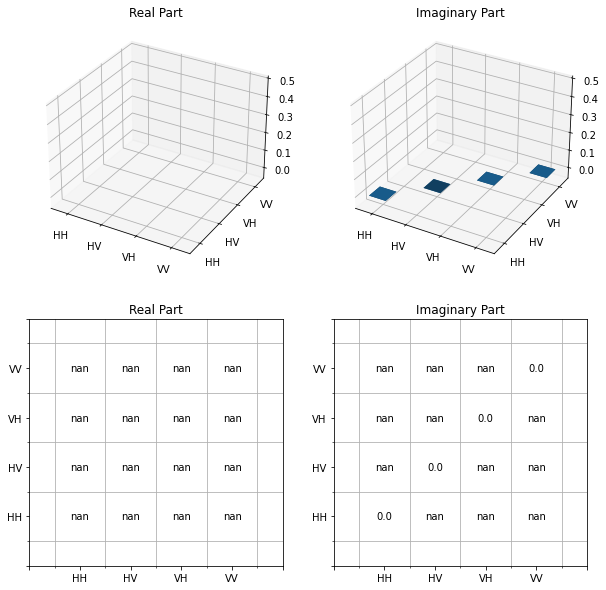

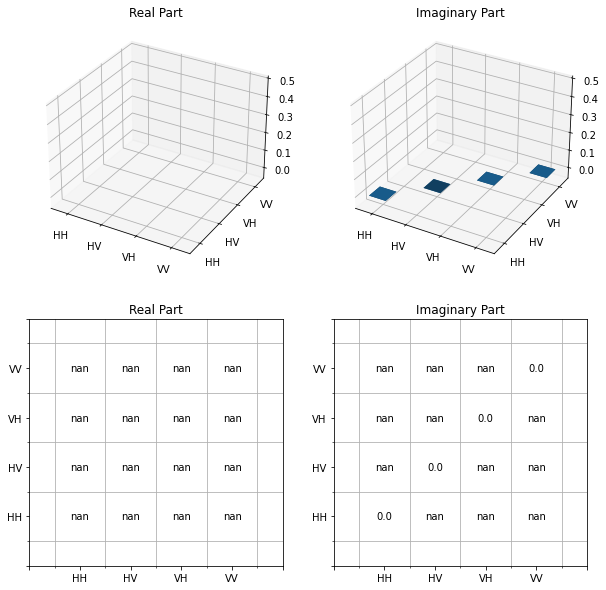

In [35]:
page = widgets.VBox([text_0, matrixInput, vbox_result])
display(page)